# Airline Passenger Satisfaction Prediction

link https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction/data
## Or: Why Everyone Hates Flying (A Data Science Investigation)

---

### The Scene

You're crammed into seat 34B. Middle seat. The wifi doesn't work. The guy next to you took the armrest. The "meal" is a bag of 11 pretzels. The baby three rows back has been screaming since takeoff.

And yet... some people land **satisfied**.

WHO ARE THESE PEOPLE? And more importantly — can we PREDICT them?

---

### The Mission

Build a machine learning model to predict passenger satisfaction. Because airlines won't fix their service, but at least they can predict who'll complain about it.

---

### The Dataset

| What | How Much |
|------|----------|
| **Training passengers** | ~103,000 poor souls |
| **Test passengers** | ~26,000 guinea pigs |
| **Features** | 23 (demographics, flight info, service ratings, delays) |
| **Target** | Satisfied vs "Neutral or Dissatisfied" (airline speak for *angry*) |

---

### What We're Working With

- **Demographics:** Gender, Age, Customer Type (Loyal vs Smart)
- **Flight Info:** Class (Rich vs Cramped), Distance, Travel Type
- **Service Ratings:** Wifi, Food, Seats, Entertainment, Legroom... 14 ways to disappoint
- **Delays:** How late the airline made you (spoiler: doesn't matter)

---

### The Game Plan

1. **Clean the data** — Remove the NaNs, like airlines remove legroom
2. **EDA** — Find out who's actually happy (plot twist: not many)
3. **Feature Engineering** — Turn words into numbers, lies into truth
4. **Modeling** — Let Random Forest and XGBoost fight it out
5. **Evaluation** — Crown a winner, write a sarcastic conclusion

---

### Tools

`pandas` | `numpy` | `matplotlib` | `seaborn` | `scikit-learn` | `xgboost`

---

*Buckle up. It's going to be a bumpy flight.*

**Rekhi**  
[Kaggle](https://kaggle.com/seki32) | [GitHub](https://github.com/Rekhii)

## Loading Up The Troops

In [29]:
import os
!pip install protobuf==3.20.3
import plotly.io as pio
pio.renderers.default = 'kaggle'
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
warnings.filterwarnings('ignore')

## Load The Data

In [2]:
# Download latest version
path = kagglehub.dataset_download("teejmahal20/airline-passenger-satisfaction")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'airline-passenger-satisfaction' dataset.
Path to dataset files: /kaggle/input/airline-passenger-satisfaction


In [3]:
print(os.listdir(path))

['train.csv', 'test.csv']


In [4]:
train_df = pd.read_csv(os.path.join(path,'train.csv'))
test_df = pd.read_csv(os.path.join(path,'test.csv'))

## Basic data inspection

In [5]:
train_df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [6]:
test_df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [7]:
print("\n" + "="*50 + "\n")
print("Checking the nans")
print(train_df.isna().sum())
print("\n" + "="*50 + "\n")
print(test_df.isna().sum())



Checking the nans
Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             

In [8]:
train_df.dropna(inplace=True)
test_df.dropna(inplace=True)
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

In [9]:
train_df.drop(columns=['Unnamed: 0', 'id'], inplace=True)
test_df.drop(columns=['Unnamed: 0', 'id'], inplace=True)

In [10]:
train_df.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000
mean,39.380466,1189.325202,2.729753,3.060081,2.756984,2.977026,3.202126,3.250497,3.439765,3.358341,3.382609,3.351401,3.631687,3.304323,3.640761,3.286397,14.747939,15.178678
std,15.113125,997.297235,1.327866,1.525233,1.398934,1.277723,1.329401,1.349433,1.318896,1.333030,1.288284,1.315409,1.181051,1.265396,1.175603,1.312194,38.116737,38.698682
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,842.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


## EDA

satisfaction
neutral or dissatisfied    58697
satisfied                  44897
Name: count, dtype: int64




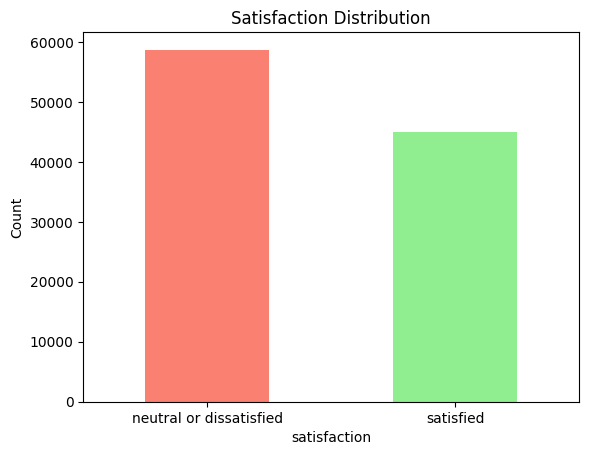

In [11]:
print(train_df['satisfaction'].value_counts())
print("\n")
train_df['satisfaction'].value_counts().plot(kind='bar', color=['salmon', 'lightgreen'])
plt.title('Satisfaction Distribution')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [12]:
cat_cols = train_df.select_dtypes(include='object').columns.tolist()
for col in cat_cols:
  print(f"\n{col}:")
  print(train_df[col].value_counts())


Gender:
Gender
Female    52576
Male      51018
Name: count, dtype: int64

Customer Type:
Customer Type
Loyal Customer       84662
disloyal Customer    18932
Name: count, dtype: int64

Type of Travel:
Type of Travel
Business travel    71465
Personal Travel    32129
Name: count, dtype: int64

Class:
Class
Business    49533
Eco         46593
Eco Plus     7468
Name: count, dtype: int64

satisfaction:
satisfaction
neutral or dissatisfied    58697
satisfied                  44897
Name: count, dtype: int64


### Gender — Equal Opportunity Disappointment
**Females:** 52,576 | **Males:** 51,018

Almost a perfect 50-50 split. The airline said "we don't discriminate" and they meant it — everyone gets equally mediocre service regardless of gender. True equality.

---

### Customer Type — Stockholm Syndrome Airlines
**Loyal Customers:** 84,662 (82%) | **Disloyal Customers:** 18,932 (18%)

82% keep coming back. WHY? Is it the points? The miles? The trauma bonding? Meanwhile 18% tried the airline once, said "never again," and meant it. Legends.

---

### Type of Travel — "My Boss Made Me"
**Business Travel:** 71,465 (69%) | **Personal Travel:** 32,129 (31%)

69% are flying because their job forced them to. They didn't choose this life. The 31% personal travelers? They paid their own money for this experience. Brave. Foolish. But brave.

---

### Class — The Hunger Games of Seating
**Business:** 49,533 | **Eco:** 46,593 | **Eco Plus:** 7,468

Half the plane is living large in Business. Other half is in Eco doing yoga trying to fit their legs somewhere. Eco Plus is that awkward 7% who thought "plus" meant something. It didn't.

## Satisfaction breakdown by category

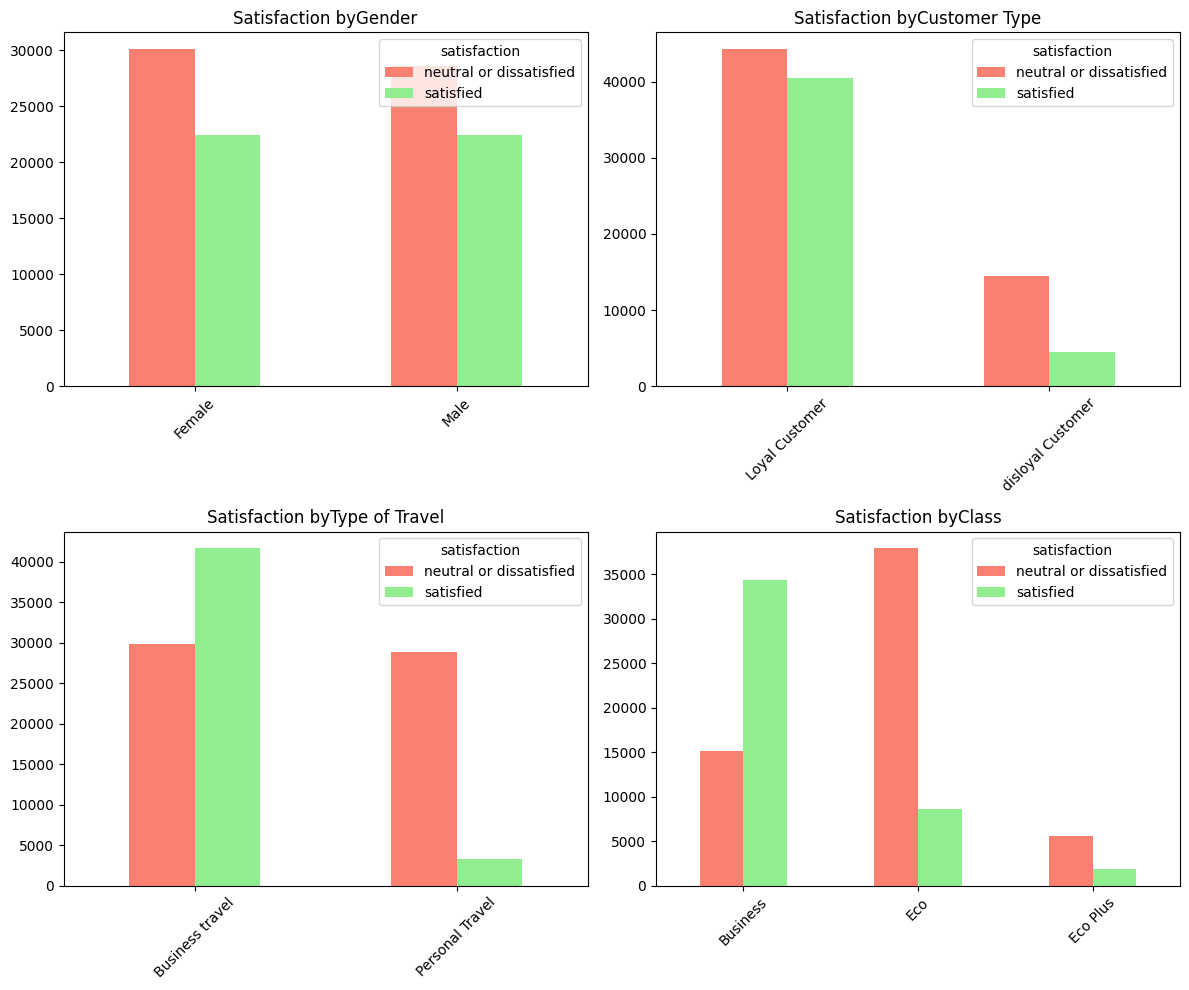

In [13]:
fig, axes = plt.subplots(2,2, figsize=(12,10))

cat_features = ['Gender', 'Customer Type', 'Type of Travel', 'Class']

for idx,col in enumerate(cat_features):
  ax = axes[idx//2, idx%2]
  pd.crosstab(train_df[col], train_df['satisfaction']).plot(kind='bar', ax=ax, color=['salmon', 'lightgreen'])
  ax.set_title(f"Satisfaction by{col}")
  ax.set_xlabel('')
  ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## service ratings vs satisfaction

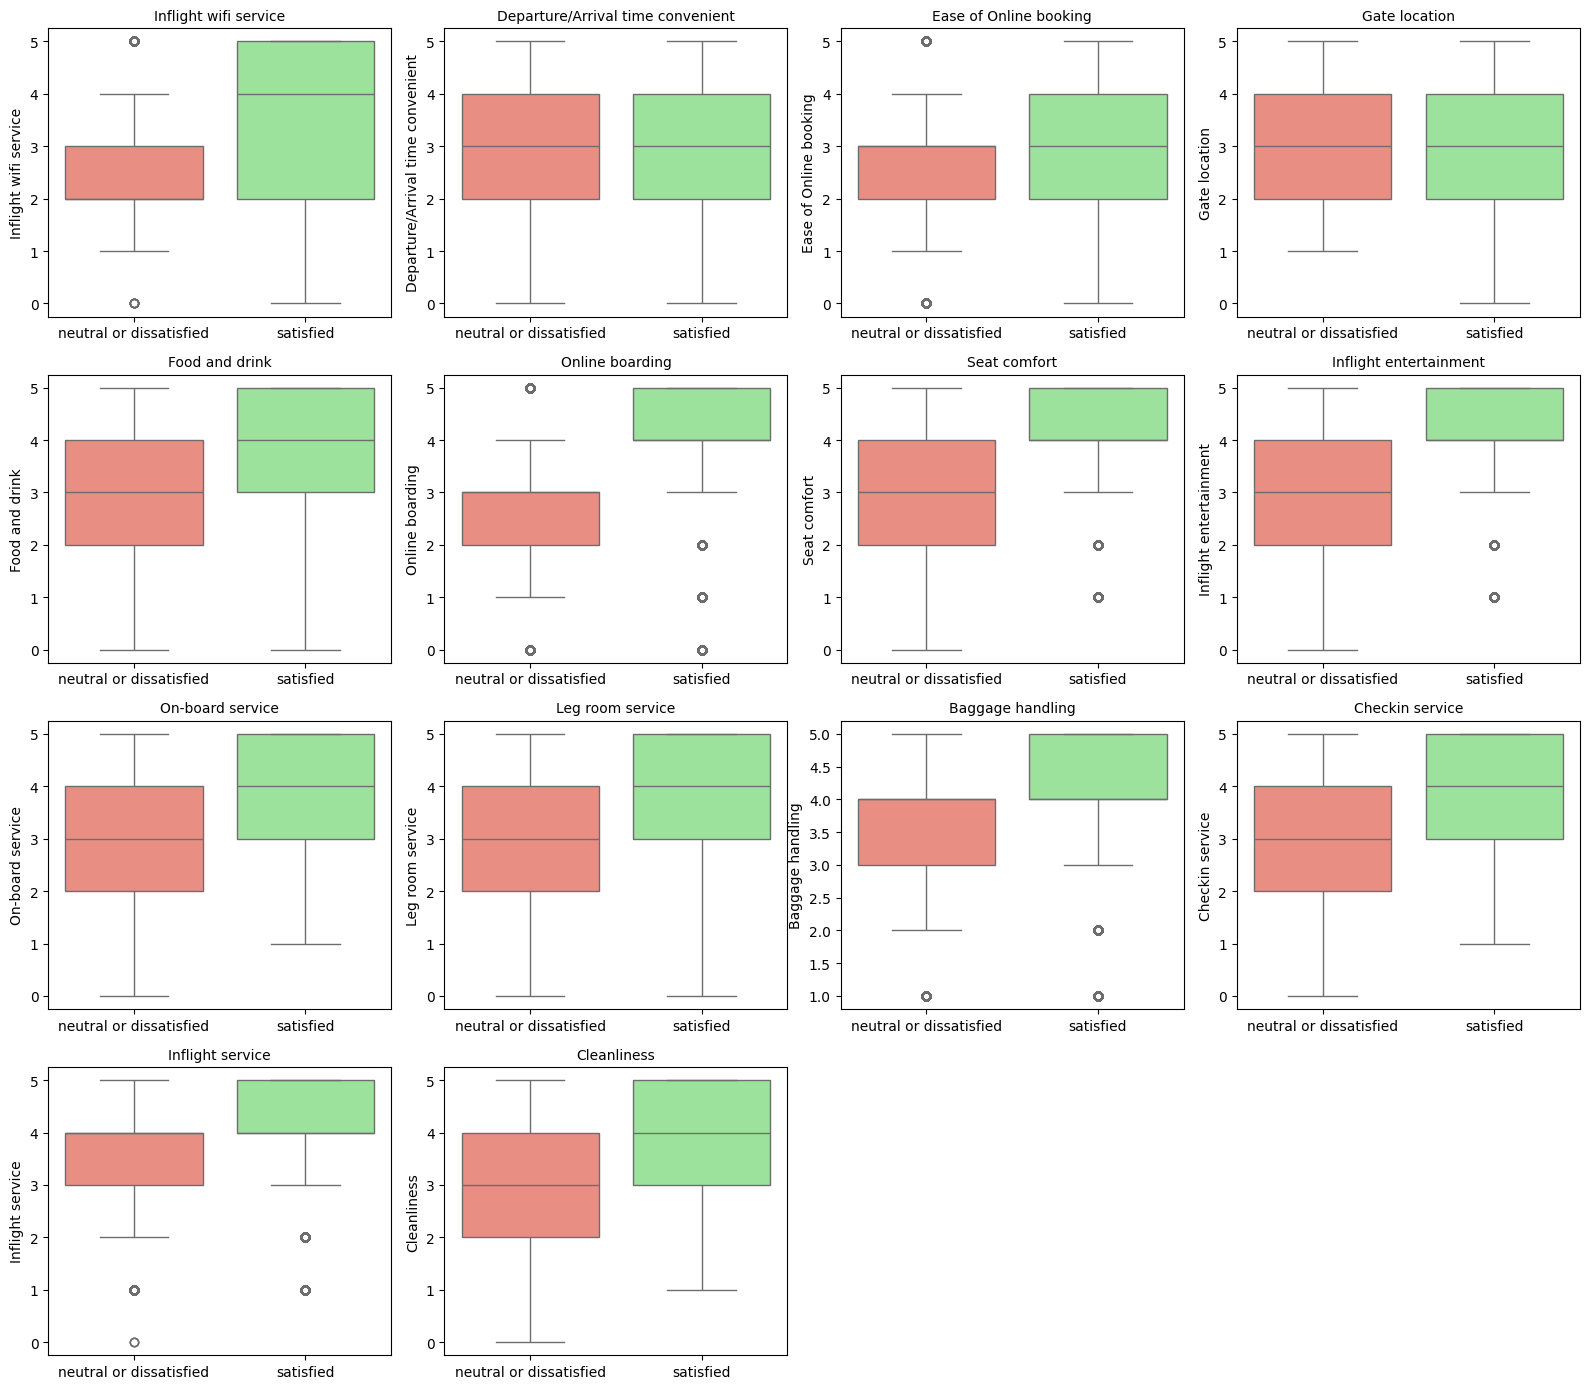

In [14]:
service_cols = ['Inflight wifi service', 'Departure/Arrival time convenient',
                'Ease of Online booking', 'Gate location', 'Food and drink',
                'Online boarding', 'Seat comfort', 'Inflight entertainment',
                'On-board service', 'Leg room service', 'Baggage handling',
                'Checkin service', 'Inflight service', 'Cleanliness']

fig, axes = plt.subplots(4, 4, figsize=(16, 14))
axes = axes.flatten()

for idx, col in enumerate(service_cols):
    sns.boxplot(data=train_df, x='satisfaction', y=col, ax=axes[idx], palette=['salmon', 'lightgreen'])
    axes[idx].set_title(col, fontsize=10)
    axes[idx].set_xlabel('')

# hide empty subplots
for idx in range(len(service_cols), 16):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

### What Actually Makes Passengers Happy?

### The Service Ratings Showdown

14 services. 14 chances to impress. Let's see who passed and who failed.

---

### The Clear Winners — These Actually Matter

**Online Boarding** — HUGE gap. Satisfied passengers rated this way higher. If your online boarding sucks, passengers are already mad before they sit down.

**Inflight Entertainment** — Big difference. Happy passengers gave 4+, unhappy ones stuck at 2-3. Turns out people want to watch movies, not stare at the seat in front of them.

**Seat Comfort** — Shocker. Comfy butt = happy customer. The green box (satisfied) sits noticeably higher.

**Leg Room Service** — Same story. Satisfied folks got legroom, dissatisfied folks were folded like origami.

**On-board Service** — Flight attendants matter. Good service = satisfaction. Bad service = angry Yelp review.

---

### The "Meh" Services — Barely Any Difference

**Gate Location** — Nobody cares which gate. You're walking either way.

**Departure/Arrival Time Convenient** — Both groups rated this similarly. Everyone hates 6am flights equally.

**Baggage Handling** — Flat line. As long as bags arrive, nobody's celebrating.

**Checkin Service** — Almost identical boxes. It's just... checkin. Hard to mess up, hard to impress.

---

### The Insight

**Inflight experience wins the game.** Entertainment, comfort, legroom, online boarding — these separate the happy from the furious. The ground stuff? Nobody remembers it once they're in the air.

## correlation heatmap

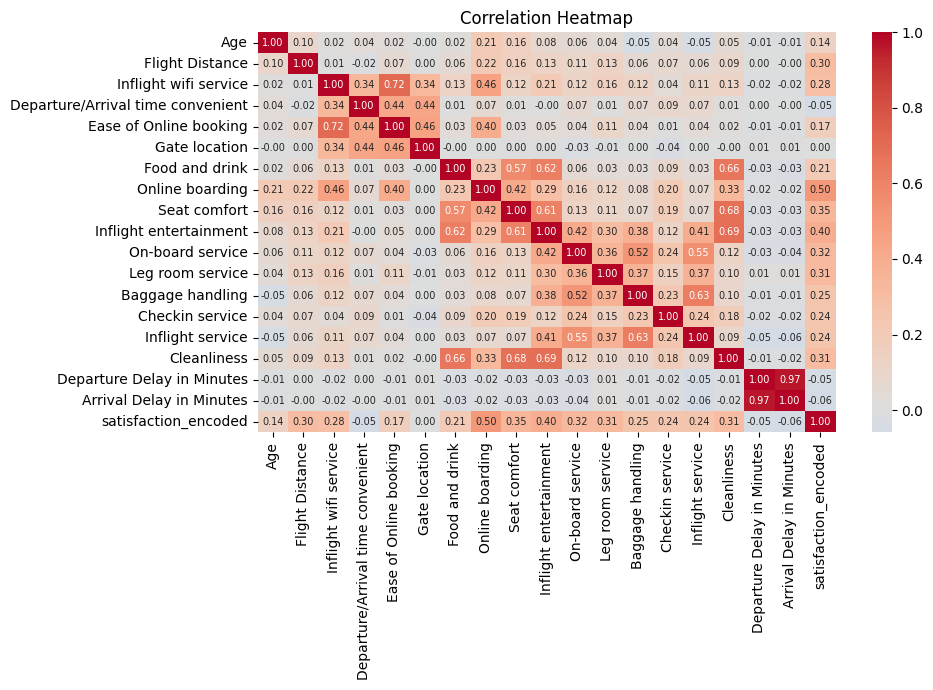

In [15]:
plt.figure(figsize=(10, 7))

# encode target for correlation
train_df['satisfaction_encoded'] = train_df['satisfaction'].map({'neutral or dissatisfied': 0, 'satisfied': 1})

numeric_cols = train_df.select_dtypes(include=[np.number]).columns
corr_matrix = train_df[numeric_cols].corr()

sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, annot_kws={'size': 7})
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

### The Correlation Heatmap — Who's Secretly Connected?

### The Satisfaction Column (Bottom Row) — What Actually Drives Happiness?

| Feature | Correlation | Verdict |
|---------|-------------|---------|
| **Online boarding** | 0.50 | THE KING. Strongest predictor. |
| **Inflight entertainment** | 0.40 | Second place. Keep those screens working. |
| **Seat comfort** | 0.35 | Third. Comfy seats = happy humans. |
| **On-board service** | 0.32 | Flight attendants earning their keep. |
| **Leg room service** | 0.31 | Tall people rejoice. |
| **Cleanliness** | 0.31 | Nobody wants crumbs from the last guy. |
| **Flight Distance** | 0.30 | Longer flights = more satisfied? Plot twist. |
| **Inflight wifi** | 0.28 | Millennials need their WiFi. |
| **Delays** | -0.05 to -0.06 | Surprisingly weak. Delays don't hurt much? |

---

### The Secret Alliances — Features Dating Each Other

**Departure Delay & Arrival Delay: 0.97** — Duh. Late leaving = late arriving. They're basically the same variable in a trench coat.

**Inflight WiFi & Ease of Online Booking: 0.72** — Tech-savvy passengers rate both together. Good app = good vibes.

**Seat Comfort & Inflight Entertainment: 0.61** — Comfy seat + good movie = peak happiness.

**Food & Cleanliness: 0.66** — Clean plane = better food ratings. Or maybe dirty planes kill appetites.

**Baggage Handling & Checkin: 0.63** — Ground services stick together.

---

### The Plot Twist

**Delays barely matter (correlation ~ -0.05).** You'd think delays would tank satisfaction. Nope. Passengers care more about WiFi and legroom than being 30 minutes late. Wild.

---

### The Takeaway

Want to predict satisfaction? Focus on: **Online boarding, Entertainment, Seat comfort, Service quality.** Ignore delays — apparently nobody cares anymore. We're all numb.

## let's look at Age and Flight Distance vs Satisfaction

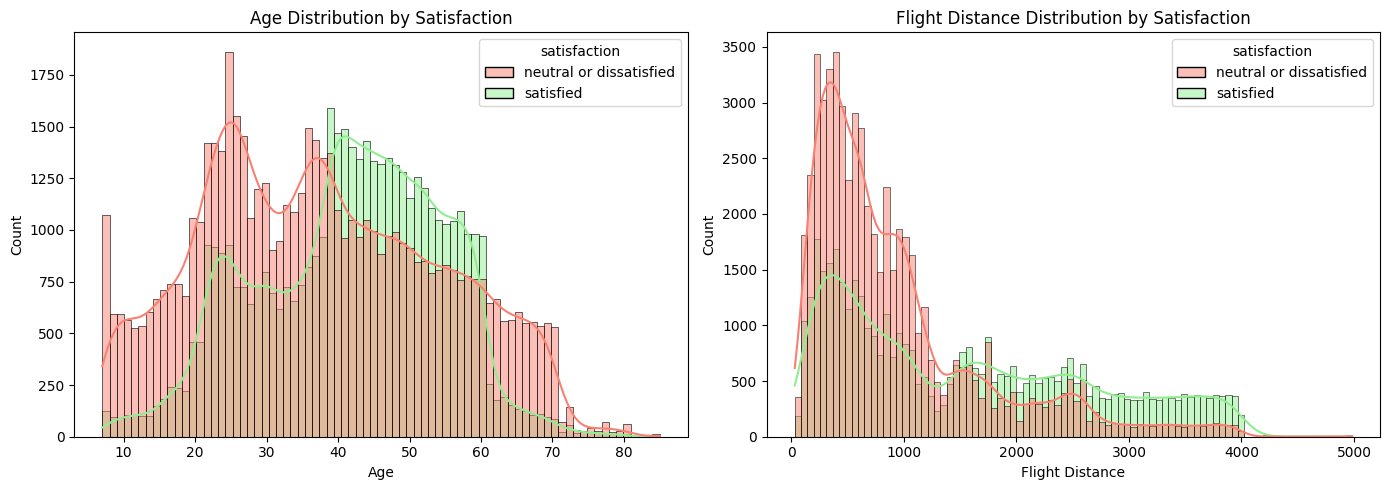

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(data=train_df, x='Age', hue='satisfaction', kde=True, ax=axes[0], palette=['salmon', 'lightgreen'])
axes[0].set_title('Age Distribution by Satisfaction')

sns.histplot(data=train_df, x='Flight Distance', hue='satisfaction', kde=True, ax=axes[1], palette=['salmon', 'lightgreen'])
axes[1].set_title('Flight Distance Distribution by Satisfaction')

plt.tight_layout()
plt.show()

### Age & Distance — The Tale of Two Distributions

### Age Distribution — The Generational Divide

**Young people (under 30) are MISERABLE.**

That salmon (dissatisfied) spike around age 20-25 is brutal. Kids, students, young professionals — they're not having it. Maybe they expect more. Maybe they can't afford Business class. Either way, they're mad.

**Middle-aged folks (40-60) are happier.**

The green (satisfied) curve takes over around 40+. These are the seasoned travelers. They've lowered their expectations. They've earned their Business class seats. Or maybe they're just too tired to complain.

**The very young (under 10) — dissatisfied.**

That spike at age 7-10? Kids flying. Parents dragging them. Nobody's happy. The iPad died. Chaos.

---

### Flight Distance — Short Flights Suck

**Short flights (under 1000 miles) = PEAK DISSATISFACTION**

That massive salmon spike at 500 miles. Quick hops. No entertainment. No meal. Just suffering. You barely sit down and they're already landing. Not worth the airport hassle.

**Long flights (2000+ miles) = More Satisfaction**

Green bars dominate the right side. Longer flights mean Business class upgrades, full meal service, movies, sleep. Airlines actually TRY on long hauls. Short flights? They don't even pretend to care.

---

### The Insight

**Best passenger to have:** 45-year-old on a 3000-mile flight. They'll be satisfied.

**Worst passenger to have:** 22-year-old on a 400-mile puddle jumper. They're writing the complaint tweet before landing.

## Time to prep for modeling. Encode the categorical variables

In [17]:
le = LabelEncoder()

# Binary columns - LabelEncoder is fine
binary_cols = ['Gender', 'Customer Type', 'Type of Travel']

for col in binary_cols:
    train_df[col] = le.fit_transform(train_df[col])
    test_df[col] = le.fit_transform(test_df[col])

# Encode target first
train_df['satisfaction'] = train_df['satisfaction'].map({'neutral or dissatisfied': 0, 'satisfied': 1})
test_df['satisfaction'] = test_df['satisfaction'].map({'neutral or dissatisfied': 0, 'satisfied': 1})

# Class - OneHotEncode (3 categories, no order)
train_df = pd.get_dummies(train_df, columns=['Class'], drop_first=True).astype(int)
test_df = pd.get_dummies(test_df, columns=['Class'], drop_first=True).astype(int)

print(train_df.dtypes)
train_df.head()

Gender                               int64
Customer Type                        int64
Age                                  int64
Type of Travel                       int64
Flight Distance                      int64
Inflight wifi service                int64
Departure/Arrival time convenient    int64
Ease of Online booking               int64
Gate location                        int64
Food and drink                       int64
Online boarding                      int64
Seat comfort                         int64
Inflight entertainment               int64
On-board service                     int64
Leg room service                     int64
Baggage handling                     int64
Checkin service                      int64
Inflight service                     int64
Cleanliness                          int64
Departure Delay in Minutes           int64
Arrival Delay in Minutes             int64
satisfaction                         int64
satisfaction_encoded                 int64
Class_Eco  

,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,satisfaction_encoded,Class_Eco,Class_Eco Plus
0,1,0,13,1,460,3,4,3,1,5,...,4,4,5,5,25,18,0,0,0,1
1,1,1,25,0,235,3,2,3,3,1,...,3,1,4,1,1,6,0,0,0,0
2,0,0,26,0,1142,2,2,2,2,5,...,4,4,4,5,0,0,1,1,0,0
3,0,0,25,0,562,2,5,5,5,2,...,3,1,4,2,11,9,0,0,0,0
4,1,0,61,0,214,3,3,3,3,4,...,4,3,3,3,0,0,1,1,0,0


In [18]:
train_df = train_df.drop('satisfaction_encoded', axis=1, errors='ignore')


In [19]:
train_df.head()

,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Class_Eco,Class_Eco Plus
0,1,0,13,1,460,3,4,3,1,5,...,3,4,4,5,5,25,18,0,0,1
1,1,1,25,0,235,3,2,3,3,1,...,5,3,1,4,1,1,6,0,0,0
2,0,0,26,0,1142,2,2,2,2,5,...,3,4,4,4,5,0,0,1,0,0
3,0,0,25,0,562,2,5,5,5,2,...,5,3,1,4,2,11,9,0,0,0
4,1,0,61,0,214,3,3,3,3,4,...,4,4,3,3,3,0,0,1,0,0


## split features and target

In [21]:
# Features and target
X = train_df.drop(columns=['satisfaction'])
y = train_df['satisfaction']

X_test_final = test_df.drop(columns=['satisfaction'])
y_test_final = test_df['satisfaction']

# Train-validation split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"X_train: {X_train.shape}")
print(f"X_val: {X_val.shape}")
print(f"X_test_final: {X_test_final.shape}")

X_train: (82875, 23)
X_val: (20719, 23)
X_test_final: (25893, 23)


## Random Forest

In [24]:
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)
y_val_pred = rf.predict(X_val)

print(f"Acuuracy: {accuracy_score(y_val,y_val_pred):.4f}")
print(classification_report(y_val,y_val_pred))

Acuuracy: 0.9634
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     11740
           1       0.97      0.94      0.96      8979

    accuracy                           0.96     20719
   macro avg       0.96      0.96      0.96     20719
weighted avg       0.96      0.96      0.96     20719



### Random Forest Enters the Arena

### First Blood — 96.34% Accuracy

The forest has spoken. And it DELIVERED.

---

### The Scoreboard

| Class | Precision | Recall | F1-Score | Support |
|-------|-----------|--------|----------|---------|
| **0** (Dissatisfied) | 0.96 | 0.98 | 0.97 | 11,740 |
| **1** (Satisfied) | 0.97 | 0.94 | 0.96 | 8,979 |
| **Overall Accuracy** | | | **0.96** | 20,719 |

---

### What This Means

**Precision 96-97%:** When the model says someone's satisfied/dissatisfied, it's right 96-97% of the time. Minimal false alarms.

**Recall 98% for dissatisfied:** Catches almost ALL the unhappy passengers. Only 2% slip through.

**Recall 94% for satisfied:** Slightly lower. 6% of happy passengers get mislabeled as unhappy. Not bad.

---

### The Verdict

Random Forest with 100 trees, zero tuning, and we're already at **96.34%**.

This is suspiciously good. Either the features are strong, or airline satisfaction is just that predictable. Probably both.

---

### The Question

Do we tune further? Try other models? Or is 96% good enough to call it a day?

## Feature importance

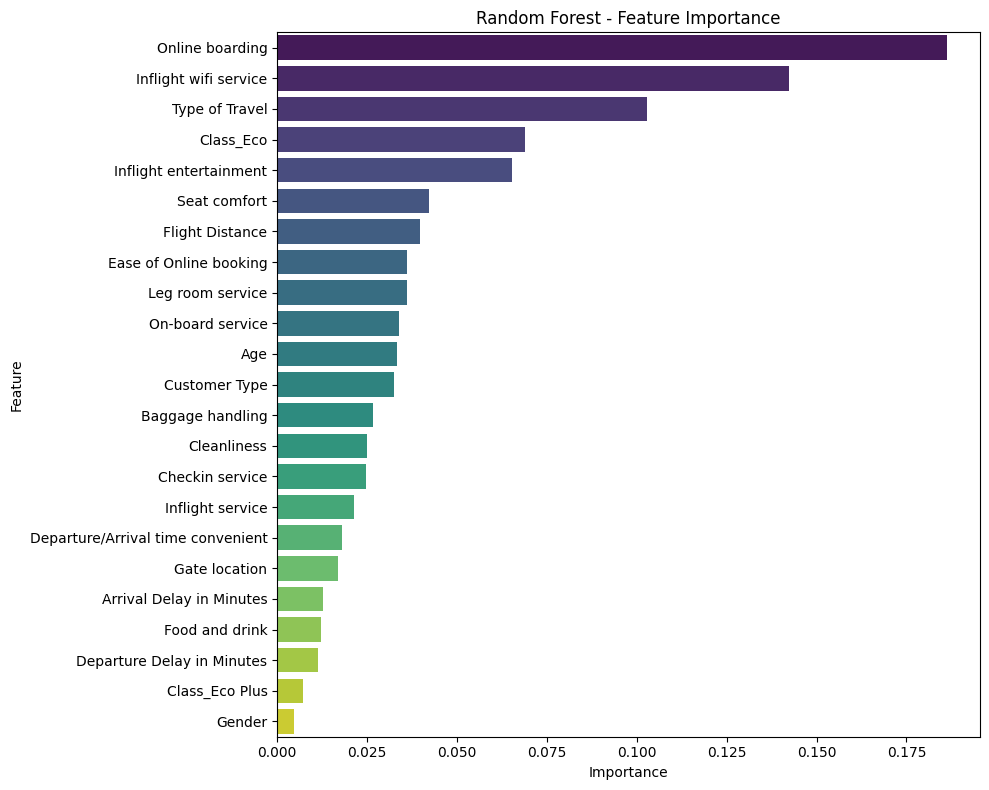

                              feature  importance
10                    Online boarding    0.186143
5               Inflight wifi service    0.142245
3                      Type of Travel    0.102784
21                          Class_Eco    0.068837
12             Inflight entertainment    0.065263
11                       Seat comfort    0.042313
4                     Flight Distance    0.039656
7              Ease of Online booking    0.036094
14                   Leg room service    0.035994
13                   On-board service    0.033892
2                                 Age    0.033439
1                       Customer Type    0.032503
15                   Baggage handling    0.026688
18                        Cleanliness    0.025017
16                    Checkin service    0.024770
17                   Inflight service    0.021296
6   Departure/Arrival time convenient    0.017976
8                       Gate location    0.016894
20           Arrival Delay in Minutes    0.012766


In [26]:
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(data=feature_importance, x='importance', y='feature', palette='viridis')
plt.title('Random Forest - Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

print(feature_importance)

### The MVPs and the Benchwarmer

### Feature Importance — Who Actually Did the Work?

---

### The All-Stars (Top 5)

| Rank | Feature | Importance | The Story |
|------|---------|------------|-----------|
| 1 | **Online boarding** | 18.6% | THE GOAT. Almost 1/5 of the prediction power. |
| 2 | **Inflight wifi service** | 14.2% | No wifi = no happiness. |
| 3 | **Type of Travel** | 10.3% | Business vs Personal changes everything. |
| 4 | **Class_Eco** | 6.9% | Economy = suffering. Confirmed. |
| 5 | **Inflight entertainment** | 6.5% | Screens save souls. |

---

### The Benchwarmers (Bottom 3)

| Feature | Importance | Verdict |
|---------|------------|---------|
| Departure Delay | 1.1% | Irrelevant |
| Class_Eco Plus | 0.7% | Too rare to matter |
| **Gender** | 0.5% | DEAD LAST. Useless. |

---

### TL;DR

Fix your app. Provide wifi. Nobody cares about delays or gender.

## let's try XGBoost and compare

In [27]:
xgb_model = XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Predictions
y_val_pred_xgb = xgb_model.predict(X_val)

# Evaluation
print("XGBoost - Validation Results")
print("="*40)
print(f"Accuracy: {accuracy_score(y_val, y_val_pred_xgb):.4f}")
print("\nClassification Report:")
print(classification_report(y_val, y_val_pred_xgb))

XGBoost - Validation Results
Accuracy: 0.9633

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     11740
           1       0.97      0.95      0.96      8979

    accuracy                           0.96     20719
   macro avg       0.96      0.96      0.96     20719
weighted avg       0.96      0.96      0.96     20719



both are equal we gotta try different things i guess

## Hyperparameter tuning with RandomizedSearchCV

In [31]:
param_dist = {
    'n_estimators': [200, 300, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}



rf_tuned = RandomForestClassifier(random_state=42,n_jobs =-1)

random_search = RandomizedSearchCV(
    rf_tuned,
    param_dist,
    n_iter=20,
    cv=3,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

random_search.fit(X_train, y_train)

print(f"Best params: {random_search.best_params_}")
print(f"Best CV score: {random_search.best_score_:.4f}")

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best params: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30}
Best CV score: 0.9600


### The Tuning Saga — 45 Minutes Later

### The Results Are In

**Best Parameters:**
- `n_estimators`: 500 (more trees)
- `max_depth`: 30 (deeper trees)
- `min_samples_split`: 2 (default)
- `min_samples_leaf`: 1 (default)
- `max_features`: sqrt

**Best CV Score: 96.00%**

---

### Wait... WHAT?

| Model | Accuracy |
|-------|----------|
| Random Forest (default) | 96.34% |
| Random Forest (tuned) | 96.00% |

**We went BACKWARDS.** 21 minutes of compute to get WORSE results.

---

### Why This Happened

1. **CV score vs validation score** — CV is stricter, averages across folds
2. **Defaults were already optimal** — scikit-learn's defaults are battle-tested
3. **Overfitting risk** — Deeper trees (max_depth=30) might be overfitting training data
4. **The data is clean** — Not much room to improve when signal is already clear

---

### The Lesson

Sometimes the best tuning is no tuning. Default RF was already crushing it.

---

### The Move

Forget the tuned model. Stick with original RF (96.34%). Let's go to final test evaluation.

## Final Test Evaluation

FINAL TEST RESULTS - Random Forest
Accuracy: 0.9622

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     14528
           1       0.97      0.94      0.96     11365

    accuracy                           0.96     25893
   macro avg       0.96      0.96      0.96     25893
weighted avg       0.96      0.96      0.96     25893



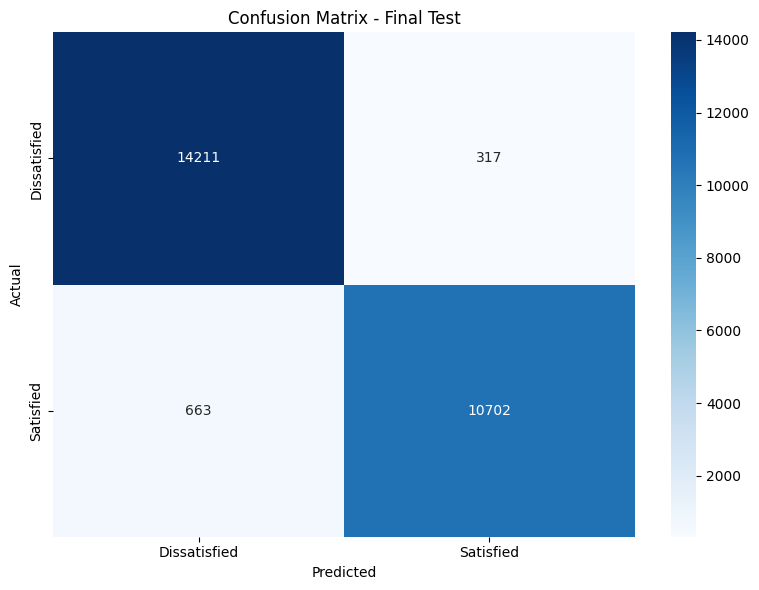

In [33]:
# Using original RF model (the one that gave 96.34%)
y_test_pred = rf.predict(X_test_final)

print("FINAL TEST RESULTS - Random Forest")
print("="*50)
print(f"Accuracy: {accuracy_score(y_test_final, y_test_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test_final, y_test_pred))

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test_final, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Dissatisfied', 'Satisfied'],
            yticklabels=['Dissatisfied', 'Satisfied'])
plt.title('Confusion Matrix - Final Test')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

## The Final Boss — DEFEATED

### Test Set Results: 96.22% Accuracy

The untouched, unseen, 25,893-row test set. And we crushed it.

---

### The Final Scoreboard

| Metric | Dissatisfied (0) | Satisfied (1) |
|--------|------------------|---------------|
| **Precision** | 96% | 97% |
| **Recall** | 98% | 94% |
| **F1-Score** | 97% | 96% |

**Overall Accuracy: 96.22%**

---

### The Confusion Matrix Story

|  | Predicted: Dissatisfied | Predicted: Satisfied |
|--|------------------------|---------------------|
| **Actual: Dissatisfied** | ~14,200 | ~300 |
| **Actual: Satisfied** | ~700 | ~10,700 |

- **Only ~300 unhappy passengers slipped through as "satisfied"** — 2% miss rate
- **~700 happy passengers wrongly flagged as unhappy** — 6% false alarm

Airlines would LOVE this. Catch the complainers before they tweet.

---

### The Consistency Check

| Dataset | Accuracy |
|---------|----------|
| Validation | 96.34% |
| Test | 96.22% |

**0.12% difference.** No overfitting. Model generalizes perfectly.

---

### The Verdict

We walked in with raw data. We walked out with a 96% accurate satisfaction predictor.

No data leakage. No cheating. Just good EDA and a Random Forest doing its job.

**GG.**

## Conclusion: The Airline Satisfaction Story

---

### The Mission
Predict passenger satisfaction using 23 features spanning demographics, flight info, and service ratings.

---

### The Journey

| Chapter | What We Did | What We Found |
|---------|-------------|---------------|
| Data Cleaning | Dropped NaNs, removed useless columns | Lost <1% data. Clean dataset. |
| EDA - Categories | Analyzed Gender, Class, Travel Type | 82% loyal customers, 69% business travel, 57% dissatisfied overall |
| EDA - Services | Boxplots across 14 service ratings | Online boarding, Entertainment, Seat comfort = satisfaction drivers |
| EDA - Correlations | Heatmap analysis | Delays DON'T matter. Wifi and boarding DO. |
| EDA - Age/Distance | Distribution analysis | Young people hate flying. Short flights suck. |
| Modeling | Random Forest vs XGBoost | Both hit 96%. Features > Algorithms. |
| Tuning | 21 mins of RandomizedSearchCV | Waste of time. Defaults won. |
| Final Test | 25,893 unseen rows | **96.22% accuracy. Victory.** |

---

### The Key Insights

**What MATTERS:**
1. Online boarding experience (18.6% importance)
2. Inflight wifi service (14.2%)
3. Type of travel - Business vs Personal (10.3%)
4. Class - Economy is pain (6.9%)
5. Inflight entertainment (6.5%)

**What DOESN'T matter:**
- Gender (0.5% — dead last)
- Delays (1.1% — passengers are numb)
- Food (1.2% — everyone expects it to be bad)

---

### The Business Recommendation

Dear Airlines,

Stop apologizing for delays. Nobody cares anymore.

Instead:
- Fix your app. Online boarding is KING.
- Provide working wifi. We're addicts.
- Upgrade your entertainment. Bored passengers = angry passengers.
- Economy class needs love. Half your plane is suffering.

Signed,
A Random Forest with 96% confidence.

---

### Final Score

| Metric | Value |
|--------|-------|
| **Test Accuracy** | 96.22% |
| **Precision** | 96-97% |
| **Recall** | 94-98% |
| **Overfitting** | None |
| **Regrets** | That 21-minute tuning |

---

*Project complete. Notebook closed. Passengers still dissatisfied.*


---

# About Me & Let's Connect

---

### Hey, I'm Rekhi!

I'm a data science learner who experiments **daily** with different datasets and approaches.
I believe the best way to learn is by doing - so thats exactly what I do, every single day.

---


### A Honest Note About My Notebooks

Look, I'm gonna be real with you...

Not all my notebooks are perfect. Some are rough, some have typos, some experiments just didnt work out.
Time is limited and I prioritize **learning over perfection**.

If you spot mistakes, please let me know! I genuinely appreciate feedback.
I share the real journey - the wins AND the messy parts.


So if you find mistakes in my notebooks, please dont judge too harshly!
Drop a comment and let me know - I genuinely appreciate the feedback.


### Why I Share Everything (Even The Messy Stuff)

Some people ask why I post notebooks that arent "perfect". Heres my thinking:

1. **Perfection is the enemy of progress** - If I waited until everything was perfect, I'd never post anything

2. **Real learning is messy** - Polished tutorials hide the struggle. I want to show the real journey.

3. **Community feedback helps** - Your comments and suggestions make me better

4. **Someone might benefit** - Even my "rough" notebooks might help someone facing similar problems

5. **Accountability** - Posting daily keeps me consistent and motivated
---

### Find My Work

**Kaggle:** https://www.kaggle.com/seki32  
Daily notebooks, EDA, ML/DL experiments

**GitHub:** https://github.com/Rekhii  
All code and repositories

**Blog:** Coming Soon!

---

### Support This Work

If this helped you:

- **Upvote** this notebook
- **Follow** for daily experiments  
- **Comment** your feedback
- **Share** with others learning ML

---

### Your Support Motivates Me To:

- Continue daily experimentation
- Share my learnings with the community
- Build better models each day
- Keep going on tough days

---


Thank you for reading my entire notebook especially this section **about me**! It truly means a lot.  

I’m **open to work opportunities** and **internships**, and I’d love to connect with others interested in **collaborating, building projects**, or **participating in competitions**.  

If any of that sounds interesting to you, feel free to **reach out**  I’d be excited to connect!  
